In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
area = meshmask.e1t[0] * meshmask.e2t[0]

# ensure tmask has same dimensions as field
tmask = tmask.rename({'z' : 'deptht'})

In [3]:
# make land versions of cmaps, land is grey
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_delta = copy.copy(cm.delta)
cm_delta.set_bad('grey')

In [4]:
base_vosaline = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/13jan18/SalishSea_1h_20180113_20180113_grid_T.nc', 
                                  data_vars = ['vosaline'])
base_votemper = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/13jan18/SalishSea_1h_20180113_20180113_grid_T.nc', 
                                  data_vars = ['votemper'])
new = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/fixed_restart/SalishSea_1h_20180101_20180131_grid_T.nc')
new


<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 335)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2018-01-01T00:30:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    sossheig              (time_counter, y, x) float32 ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sigma_theta           (time_counter, deptht, y, x) float32 ...
    e3t                   (time_counter, deptht, y, x) float32 ...
    outfall               (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20180101_20180131_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2023-Oct-11 23:39:32 GMT
    uuid:         6717a31c-e301-40b1-8c28-ae1fdc3d30b8

In [8]:
time_slice = slice(288, 312)
new__time_slice= new.isel(time_counter = time_slice)

new__time_slice

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2018-01-13T00:30:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    sossheig              (time_counter, y, x) float32 ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sigma_theta           (time_counter, deptht, y, x) float32 ...
    e3t                   (time_counter, deptht, y, x) float32 ...
    outfall               (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20180101_20180131_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2023-Oct-11 23:39:32 GMT
    uuid:         6717a31c-e301-40b1-8c28-ae1fdc3d30b8

In [9]:
def planview(base, new, field, it, ide, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title(f'Base {field}')

    new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]-
     base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]).where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]
     ).plot(ax=axs[2], cmap=cm_bwr, 
                                                              vmax=dvmax, vmin=-dvmax)
    axs[2].set_title(f'Difference (New-Base) {field}')

    for ax in axs:
        viz_tools.set_aspect(ax)

    fig.suptitle(f'Depth {base.deptht[ide].values:.0f} m')

    axs[0].scatter(304 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[0].scatter(304 - 280, 447 - 430, marker = 'x', color = 'm')
    axs[0].scatter(305 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[0].scatter(305 - 280, 447 - 430, marker = 'x', color = 'm')

    axs[1].scatter(304 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[1].scatter(304 - 280, 447 - 430, marker = 'x', color = 'm')
    axs[1].scatter(305 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[1].scatter(305 - 280, 447 - 430, marker = 'x', color = 'm')

    axs[2].scatter(304 - 280, 446 - 430, marker = 'x', color = 'g')
    axs[2].scatter(304 - 280, 447 - 430, marker = 'x', color = 'g')
    axs[2].scatter(305 - 280, 446 - 430, marker = 'x', color = 'g')
    axs[2].scatter(305 - 280, 447 - 430, marker = 'x', color = 'g')

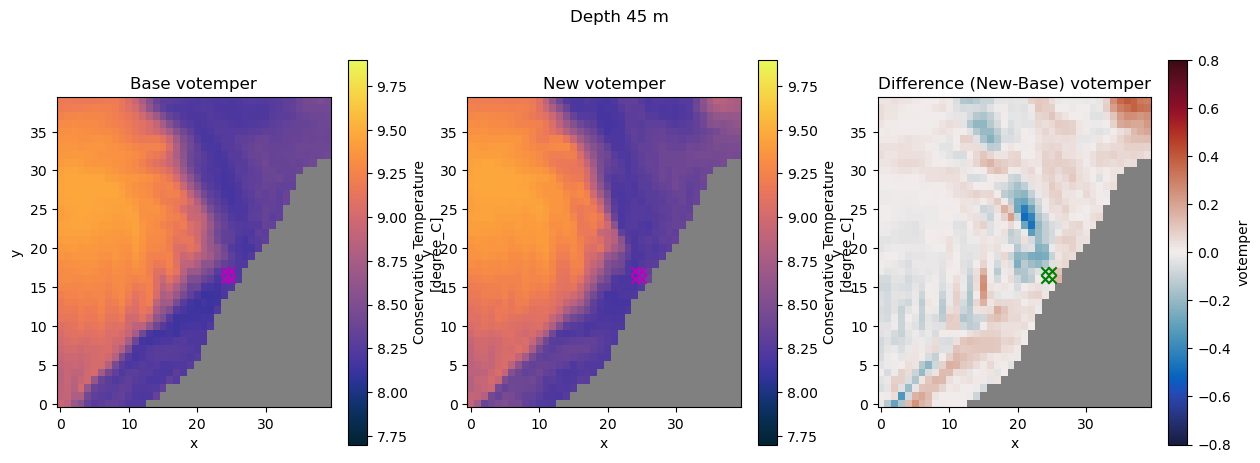

In [21]:
planview(base_votemper, new__time_slice, 'votemper', 23, 23 , cm_temp, 9.9, 7.7, 0.8)

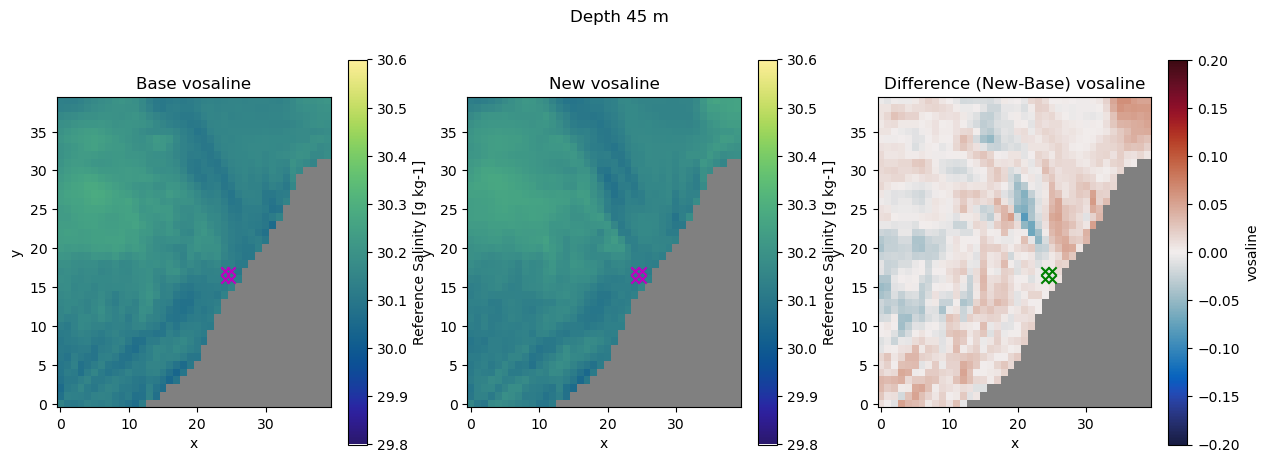

In [22]:
planview(base_vosaline, new__time_slice, 'vosaline', 23, 23 , cm_salt, 30.6, 29.8, 0.2)

In [23]:
# vertical view for y = 446 or y = 447
def verticalview(base, new, field, it, dep, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, :, dep, 250+iz:350-iz].where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[0].set_title(f'Base {field}')

    new[field][it, :, dep, 250+iz:350-iz].where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, :, dep, 250+iz:350-iz]-
     base[field][it, :, dep, 250+iz:350-iz]).where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[2], cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs[2].set_title(f'Difference (New-Base) {field}')

    fig.suptitle(f'Vertical view at y = {dep}')

    if dep == 446:
     axs[0].scatter(304 - 280, 98, marker = 'x', color = 'm')
     axs[0].scatter(305 - 280, 76, marker = 'x', color = 'm')

     axs[1].scatter(304 - 280, 98, marker = 'x', color = 'm')
     axs[1].scatter(305 - 280, 76, marker = 'x', color = 'm')

     axs[2].scatter(304 - 280, 98, marker = 'x', color = 'g')
     axs[2].scatter(305 - 280, 76, marker = 'x', color = 'g')
    else:
     axs[0].scatter(304 - 280, 121, marker = 'x', color = 'm')
     axs[0].scatter(305 - 280, 98, marker = 'x', color = 'm')

     axs[1].scatter(304 - 280, 121, marker = 'x', color = 'm')
     axs[1].scatter(305 - 280, 98, marker = 'x', color = 'm')

     axs[2].scatter(304 - 280, 121, marker = 'x', color = 'g')
     axs[2].scatter(305 - 280, 98, marker = 'x', color = 'g')

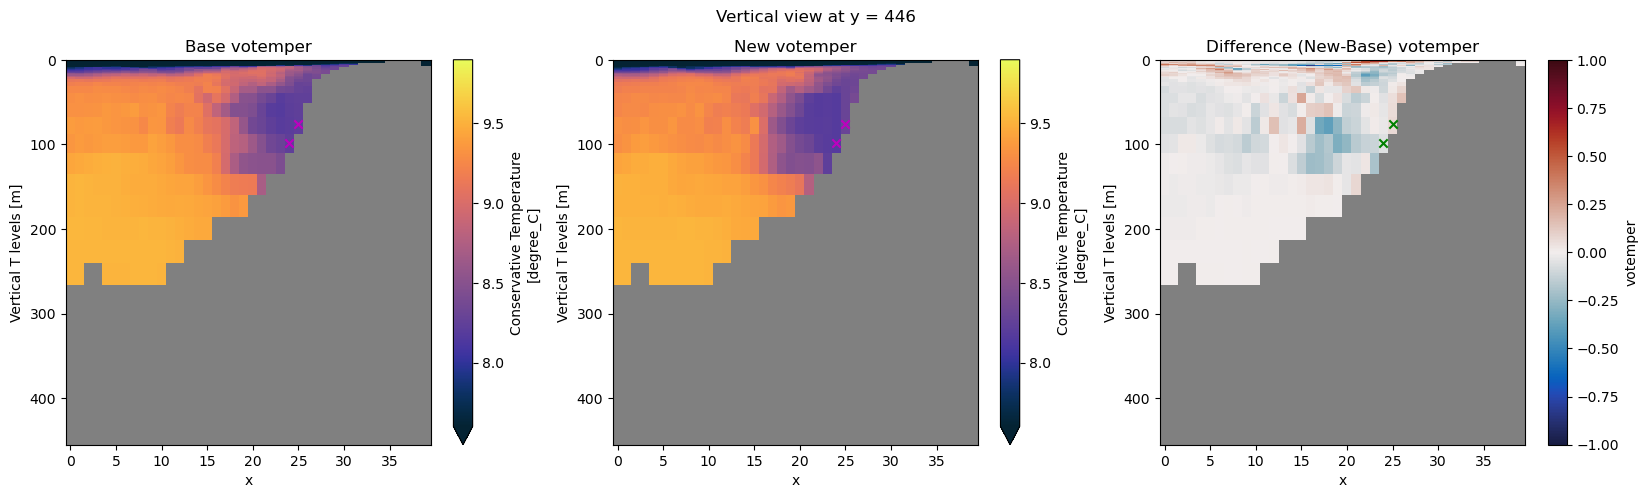

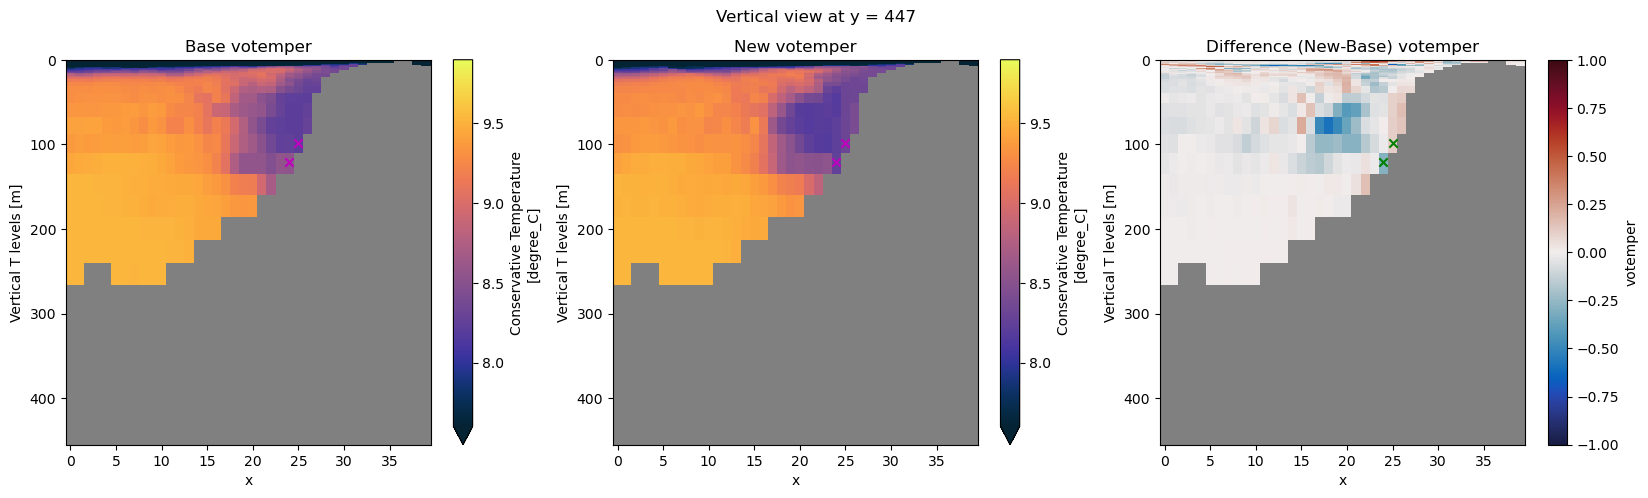

In [24]:
verticalview(base_votemper, new__time_slice, 'votemper', 23, 446, cm_temp, 9.9, 7.6, 1)
verticalview(base_votemper, new__time_slice, 'votemper', 23, 447, cm_temp, 9.9, 7.6, 1)

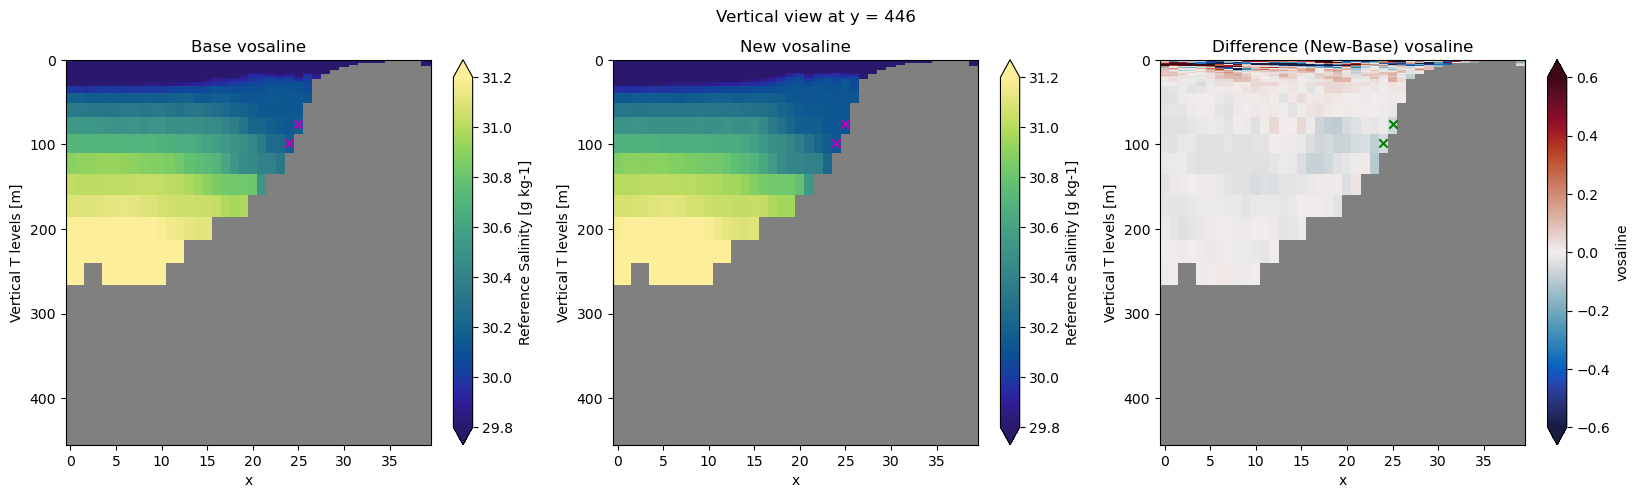

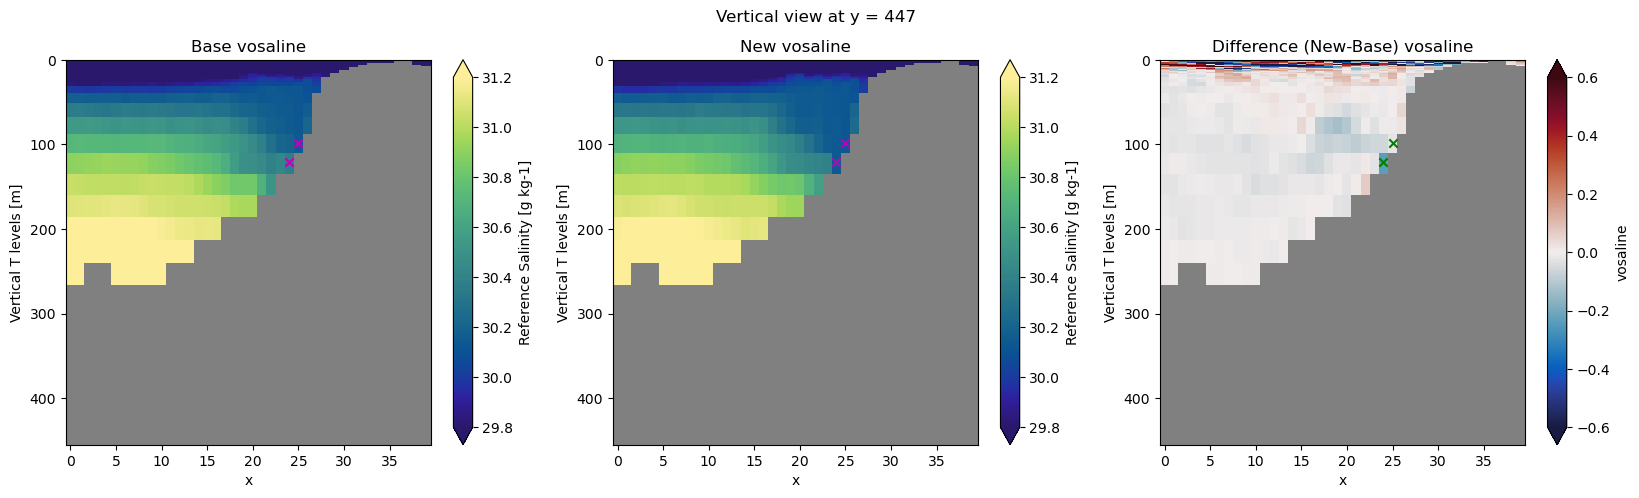

In [25]:
verticalview(base_vosaline, new__time_slice, 'vosaline', 23, 446, cm_salt, 31.2, 29.8, 0.6)
verticalview(base_vosaline, new__time_slice, 'vosaline', 23, 447, cm_salt, 31.2, 29.8, 0.6)

In [26]:
def vertical_view_x(base, new, field, it, dep,  cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, :, 400+iz:500-iz, dep].where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[0].set_title(f'Base {field}')

    new[field][it, :, 400+iz:500-iz, dep].where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, :, 400+iz:500-iz, dep]-
     base[field][it, :, 400+iz:500-iz, dep]).where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[2], cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs[2].set_title(f'Difference (New-Base) {field}')

    fig.suptitle(f'Vertical view at x = {dep}')

    if dep == 304:
        axs[0].scatter(447 - 430, 121, marker = 'x', color = 'm')
        axs[0].scatter(446 - 430, 98, marker = 'x', color = 'm')

        axs[1].scatter(447 - 430, 121, marker = 'x', color = 'm')
        axs[1].scatter(446 - 430, 98, marker = 'x', color = 'm')

        axs[2].scatter(447 - 430, 121, marker = 'x', color = 'g')
        axs[2].scatter(446 - 430, 98, marker = 'x', color = 'g')
    
    else:
        axs[0].scatter(447 - 430, 98, marker = 'x', color = 'm')
        axs[0].scatter(446 - 430, 76, marker = 'x', color = 'm')

        axs[1].scatter(447 - 430, 98, marker = 'x', color = 'm')
        axs[1].scatter(446 - 430, 76, marker = 'x', color = 'm')

        axs[2].scatter(447 - 430, 98, marker = 'x', color = 'g')
        axs[2].scatter(446 - 430, 76, marker = 'x', color = 'g')

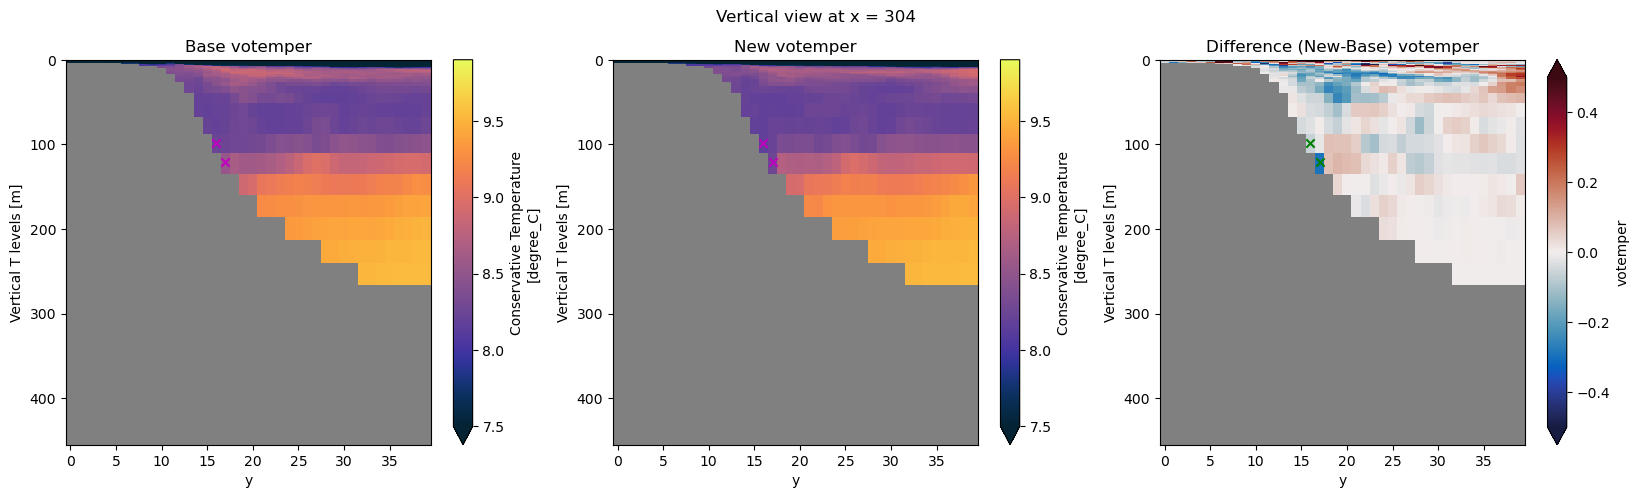

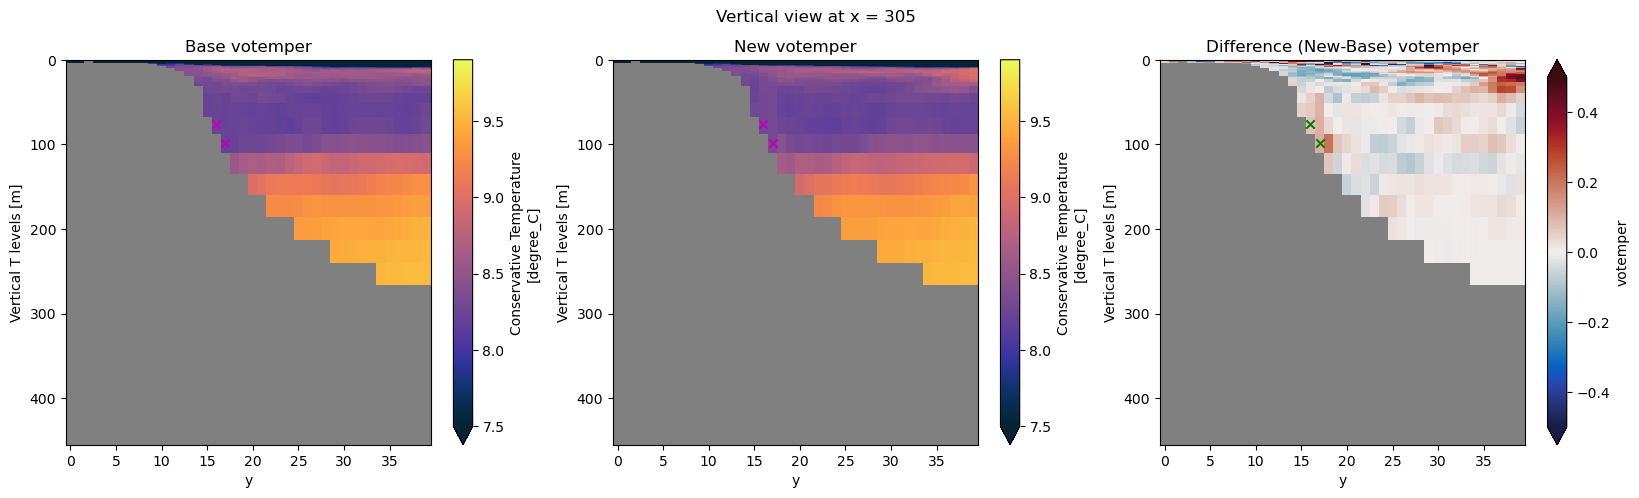

In [29]:
vertical_view_x(base_votemper, new__time_slice, 'votemper', 23, 304, cm_temp, 9.9, 7.5, 0.5)
vertical_view_x(base_votemper, new__time_slice, 'votemper', 23, 305, cm_temp, 9.9, 7.5, 0.5)

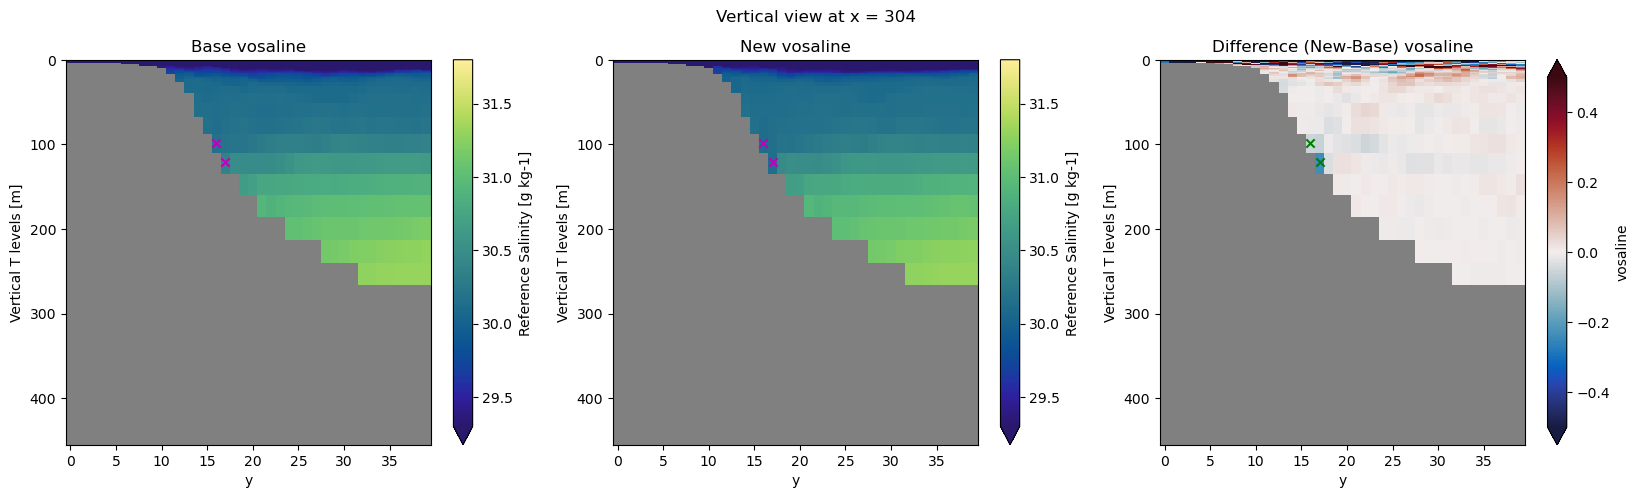

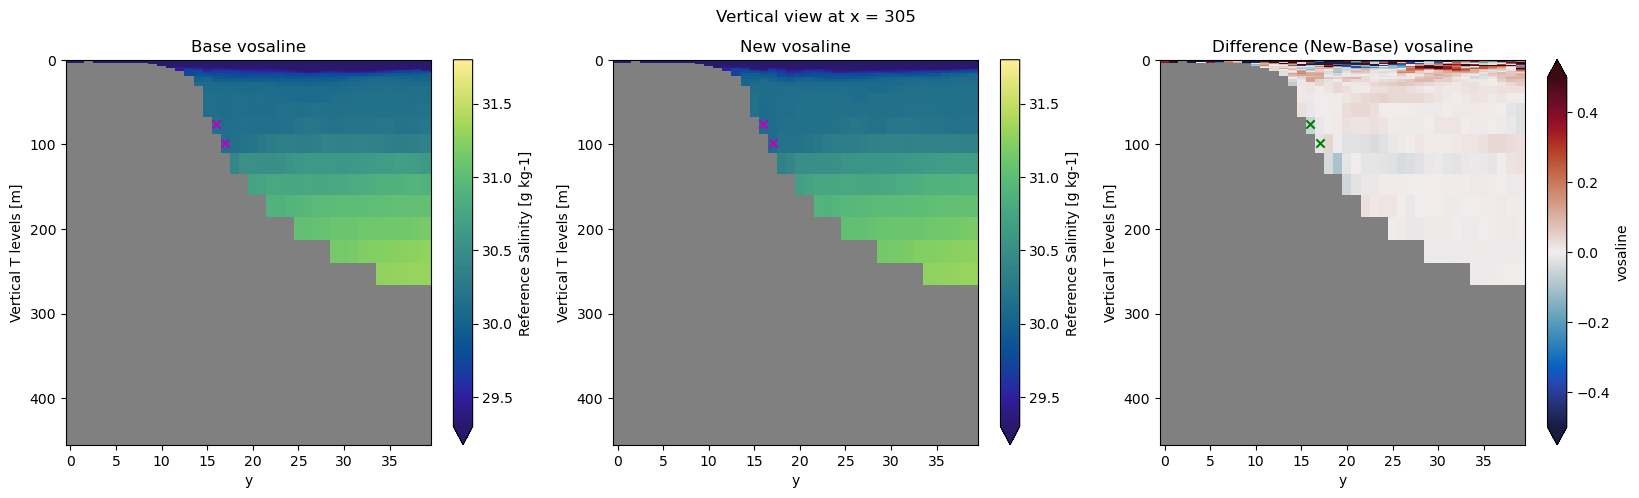

In [33]:
vertical_view_x(base_vosaline, new__time_slice, 'vosaline', 23, 304, cm_salt, 31.8, 29.3, 0.5)
vertical_view_x(base_vosaline, new__time_slice, 'vosaline', 23, 305, cm_salt, 31.8, 29.3, 0.5)

In [40]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)
time_slice = slice(288, 312)
new_slice= new.isel(time_counter = time_slice, y = y_slice, x = x_slice)
base_votemper_slice = base_votemper.isel(y = y_slice, x = x_slice)
base_vosaline_slice = base_vosaline.isel(y = y_slice, x = x_slice)

In [44]:
def plotSumDiffTimeLine(base, new, field, vmin, vmax, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    diff = new[field]- base[field]
    sum_diff = diff.sum(dim = ["y", "x"])
    max_depth = sum_diff.argmax(dim = 'deptht')
    sum_diff.plot(ax=axs, y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    axs.set_title(f'Time Series for Sum of difference for {field}')
    axs.plot(sum_diff['time_counter'], sum_diff['deptht'][max_depth], 'r-')
    axs.set_ylim(150, 0)

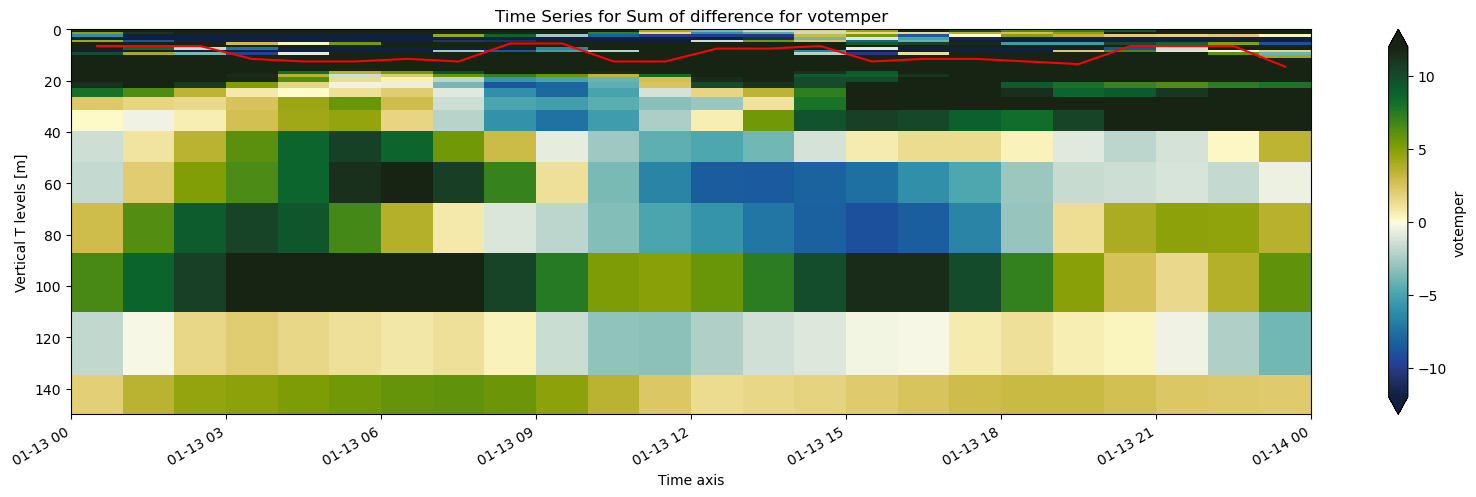

In [45]:
plotSumDiffTimeLine(base_votemper_slice, new_slice, 'votemper', -12, 12, cm_delta)

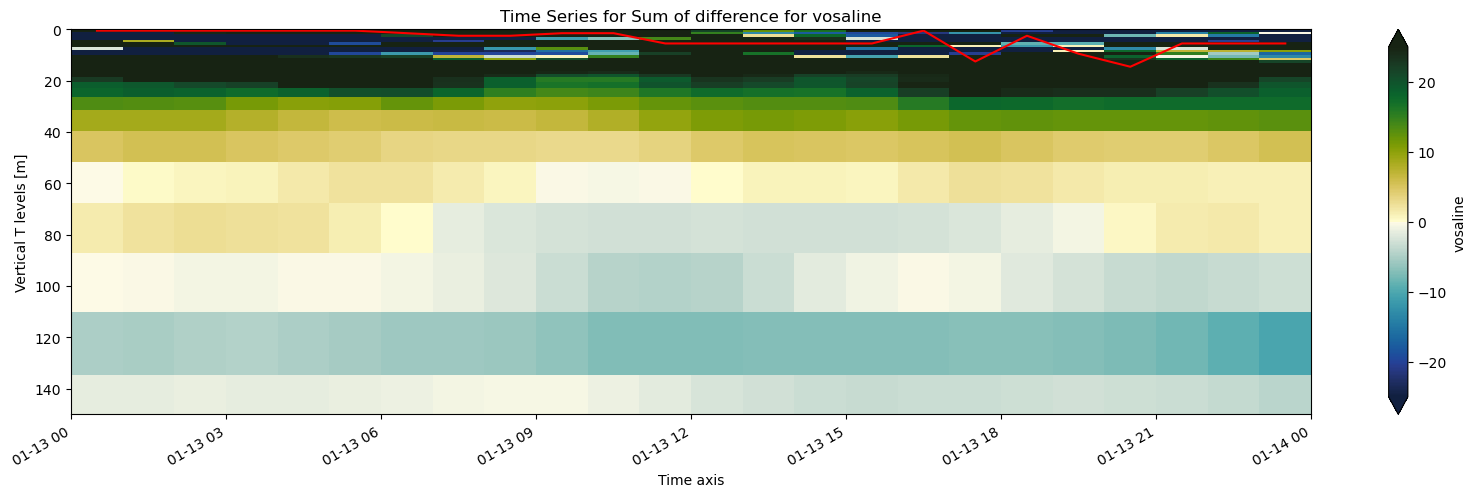

In [46]:
plotSumDiffTimeLine(base_vosaline_slice, new_slice, 'vosaline', -25, 25, cm_delta)